In [1]:
import numpy

import rscha2d
import fibonacci_sphere
import trig
import constants
import coords
import gauge

from matplotlib import pyplot, colors
%matplotliblib nbagg


In [2]:
lat_c = 42.0
lon_c = 20.0
theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-lat_c, lon_c, 26.0, 50.0))
knots_bd = numpy.arange(-2100, 2050, 50)

theta_m, phi_m = fibonacci_sphere.grid(5000)
in_cap = trig.angulardist(theta_m, phi_m, theta_c, phi_c) < theta_0d
theta_m = theta_m[in_cap]; phi_m = phi_m[in_cap]

r_m = numpy.ones_like(theta_m)*constants.a_r
times_dbd, r_dbd, theta_dbd, phi_dbd = coords.anything(r_m, theta_m, phi_m, knots_bd)

In [3]:
model = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d,
                       cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                       knots=knots_bd,
                       spatial_reg=1e-4, temporal_reg=1e-2)

In [4]:
model.add_data("../data/rscha2d/bd_javi_21abril.dat")

0


#### histogramos

<IPython.core.display.Javascript object>


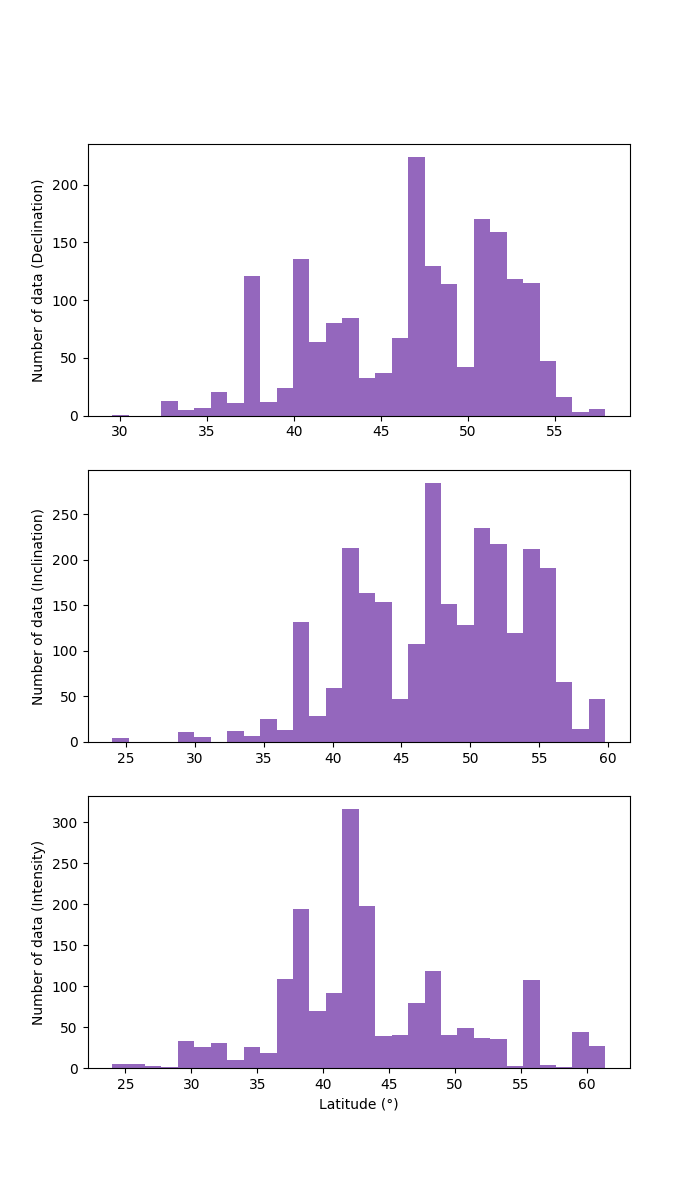

In [5]:
fig, axes = pyplot.subplots(3, 1, figsize=(7, 12))

axes[0].hist(model.lat[~model.nan_D & (model.tv > -1000)], bins=30, color="C4")
axes[0].set_ylabel("Number of data (Declination)")
axes[1].hist(model.lat[~model.nan_I & (model.tv > -1000)], bins=30, color="C4")
axes[1].set_ylabel("Number of data (Inclination)")
axes[2].hist(model.lat[~model.nan_F & (model.tv > -1000)], bins=30, color="C4")
axes[2].set_ylabel("Number of data (Intensity)")
axes[2].set_xlabel("Latitude (°)")

pyplot.show(fig)
fig.savefig("../data/rscha2d/data_vs_lat.png", frameon=True)

<IPython.core.display.Javascript object>


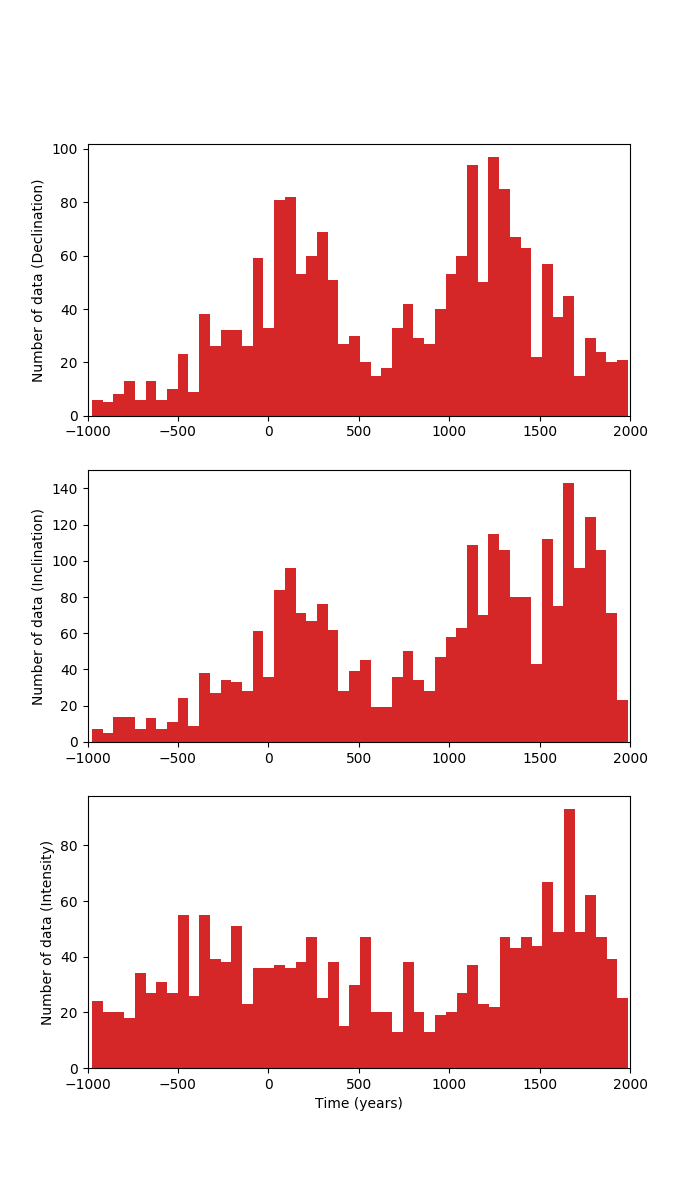

In [6]:
fig, axes = pyplot.subplots(3, 1, figsize=(7, 12))

axes[0].hist(model.tv[~model.nan_D & (model.tv > -1000)], bins=50, color="C3")
axes[0].set_ylabel("Number of data (Declination)")
axes[1].hist(model.tv[~model.nan_I & (model.tv > -1000)], bins=50, color="C3")
axes[1].set_ylabel("Number of data (Inclination)")
axes[2].hist(model.tv[~model.nan_F & (model.tv > -1000)], bins=50, color="C3")
axes[2].set_ylabel("Number of data (Intensity)")
axes[2].set_xlabel("Time (years)")

for ax in axes:
    ax.set_xbound(-1000, 2000)

pyplot.show(fig)
fig.savefig("../data/rscha2d/data_vs_time.png", frameon=True)

In [3]:
model = rscha2d.Model()
model.set_model_params(theta_c, phi_c, theta_0d,
                       cap_edge=0, kmax_int=3, kmax_ext=3, m_max=2, g10_ref=-30,
                       knots=knots_bd,
                       spatial_reg=1e-4, temporal_reg=1e-2)

In [4]:
model.add_data("../data/rscha2d/GlobalDatabase-18April2017.dat")

1001


/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


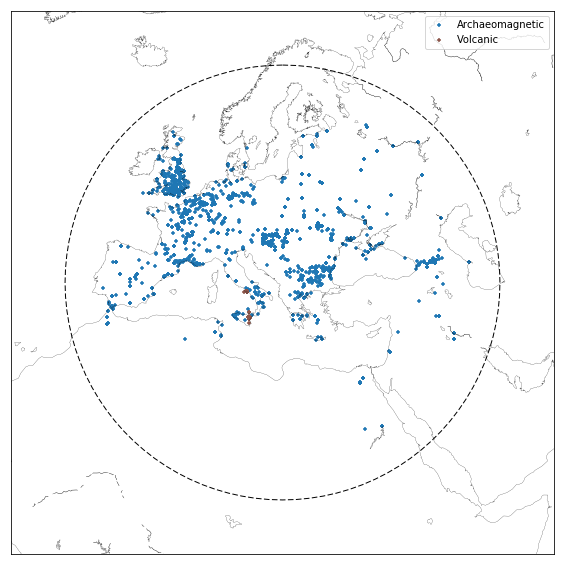

In [6]:
from mpl_toolkits import basemap

#direcciones

fig, ax = pyplot.subplots(figsize=(10,10))
base = basemap.Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-numpy.rad2deg(theta_0d*1.25))
base2 = basemap.Basemap(projection="aeqd", lon_0 = lon_c, lat_0 = lat_c, lat_ts=26,
                        width=base.xmax, height=base.ymax, resolution="l")
base2.drawcoastlines(ax=ax, linewidth=0.2)

base2.scatter(model.lon[(~model.nan_D | ~model.nan_I) & ~model.volcanic & (model.tv > -1000)],
              model.lat[(~model.nan_D | ~model.nan_I) & ~model.volcanic & (model.tv > -1000)],
              s=18, latlon=True, marker="+", color="C0", label="Archaeomagnetic")
base2.scatter(model.lon[(~model.nan_D | ~model.nan_I) & model.volcanic & (model.tv > -1000)],
              model.lat[(~model.nan_D | ~model.nan_I) & model.volcanic & (model.tv > -1000)],
              s=18, latlon=True, marker="+", color="C5", label="Volcanic")

base2.tissot(lon_c, lat_c, numpy.rad2deg(theta_0d), 100,
             facecolor="none", edgecolor="black", linestyle="dashed")

#ax.set_title(r"$\lambda_c = {}°, \phi_c = {}°, \lambda_0 = {}°$".format(lat_c, lon_c, numpy.rad2deg(theta_0d)))
ax.legend()
pyplot.show(fig)
fig.savefig("../data/rscha2d/directions_map.png", frameon=False)

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


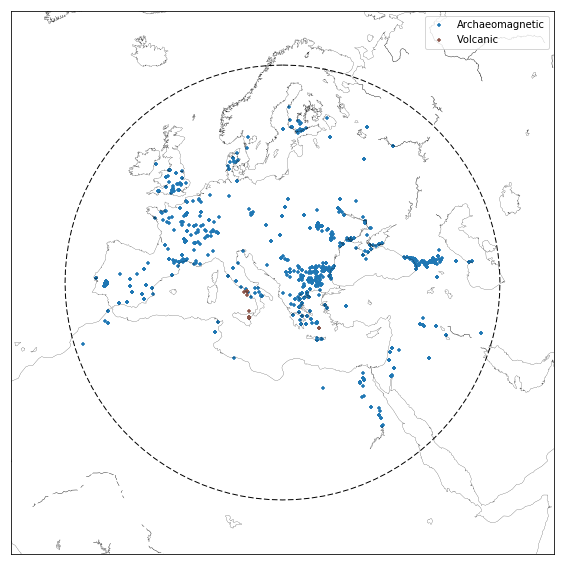

In [7]:
from mpl_toolkits import basemap

#intensidad

fig, ax = pyplot.subplots(figsize=(10,10))
base = basemap.Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-numpy.rad2deg(theta_0d*1.25))
base2 = basemap.Basemap(projection="aeqd", lon_0 = lon_c, lat_0 = lat_c, lat_ts=26,
                        width=base.xmax, height=base.ymax, resolution="l")
base2.drawcoastlines(ax=ax, linewidth=0.2)

base2.scatter(model.lon[~model.nan_F & ~model.volcanic & (model.tv > -1000)],
              model.lat[~model.nan_F & ~model.volcanic & (model.tv > -1000)],
              s=18, latlon=True, marker="+", color="C0", label="Archaeomagnetic")
base2.scatter(model.lon[~model.nan_F & model.volcanic & (model.tv > -1000)],
              model.lat[~model.nan_F & model.volcanic & (model.tv > -1000)],
              s=18, latlon=True, marker="+", color="C5", label="Volcanic")

base2.tissot(lon_c, lat_c, numpy.rad2deg(theta_0d), 100,
             facecolor="none", edgecolor="k", linestyle="dashed")

#ax.set_title(r"$\lambda_c = {}°, \phi_c = {}°, \lambda_0 = {}°$".format(lat_c, lon_c, numpy.rad2deg(theta_0d)))
ax.legend()
pyplot.show(fig)
fig.savefig("../data/rscha2d/intensity_map.png", frameon=False)

#### 